In [308]:
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as ptchs
from matplotlib import gridspec
import matplotlib.text as mtext

import scipy.integrate
import scipy.optimize
from sklearn.linear_model import Ridge

import pandas as pd
from pandas.core.base import PandasObject

system = "l4"
vd_input_folder = f"{system}-cpu/"
mb_input_folder = f"../microbenchmarks/{system}/"
output_folder = f"../../images/{system}"
%run ../notebook_setup.ipynb

# Validation Data

## Inner validation

In [309]:
# validation_results = "das6-cpu/20231127-223143" 
inner_validation_results = f"{vd_input_folder}/inner_validation" 
inner_validation_df = pd.read_csv(inner_validation_results)
inner_validation_df["nvals"] =  inner_validation_df["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
inner_validation_df["distribution"] =  inner_validation_df["input"].apply(lambda s: s.split("_")[1])
convert_to_type(inner_validation_df, "tfindbin", np.float64)
convert_to_type(inner_validation_df, "tfill", np.float64)
convert_to_type(inner_validation_df, "tstats", np.float64)
convert_to_type(inner_validation_df, "edges", np.bool_)
del inner_validation_df["input"]
inner_validation_df

,iter,env,nthreads,nbins,bulksize,edges,tfindbin,tfill,tstats,ttotal,nvals,distribution
0,0,CPU,1,10,1,False,1.124825,0.893294,0.894799,6.476572,5.000000e+07,uniform
1,0,CPU,1,10,1,False,2.247089,1.786975,1.788669,12.651636,1.000000e+08,uniform
2,0,CPU,1,10,1,False,11.237829,8.925306,8.936201,64.012907,5.000000e+08,uniform
3,0,CPU,1,10,1,False,22.466257,17.943364,17.877347,126.320811,1.000000e+09,uniform
4,0,CPU,1,10,1,False,1.124287,0.893088,0.894574,6.464808,5.000000e+07,constant-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4475,4,CPU,1,10000000,262144,True,242.211155,102.339769,18.022694,393.747302,1.000000e+09,normal-0.4-0.1
4476,4,CPU,1,10000000,262144,True,8.173643,4.707604,0.901068,15.526217,5.000000e+07,normal-0.7-0.01
4477,4,CPU,1,10000000,262144,True,16.474228,9.478578,1.801463,31.083019,1.000000e+08,normal-0.7-0.01
4478,4,CPU,1,10000000,262144,True,82.531702,48.326642,8.997447,155.805720,5.000000e+08,normal-0.7-0.01


## Total validation

In [310]:
validation_results = f"{vd_input_folder}/validation" 
validation_df = pd.read_csv(validation_results)
validation_df["nvals"] =  validation_df["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
validation_df["distribution"] =  validation_df["input"].apply(lambda s: s.split("_")[1])
convert_to_type(validation_df, "tfindbin", np.float64)
convert_to_type(validation_df, "tfill", np.float64)
convert_to_type(validation_df, "tstats", np.float64)
convert_to_type(validation_df, "edges", np.bool_)
del validation_df["input"]
validation_df

,iter,env,nthreads,nbins,bulksize,edges,tfindbin,tfill,tstats,ttotal,nvals,distribution
0,0,CPU,1,10,1,False,0.0,0.0,0.0,2.641837,5.000000e+07,uniform
1,0,CPU,1,10,1,False,0.0,0.0,0.0,5.306042,1.000000e+08,uniform
2,0,CPU,1,10,1,False,0.0,0.0,0.0,26.743646,5.000000e+08,uniform
3,0,CPU,1,10,1,False,0.0,0.0,0.0,52.471924,1.000000e+09,uniform
4,0,CPU,1,10,1,False,0.0,0.0,0.0,2.691372,5.000000e+07,constant-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,219.744214,1.000000e+09,normal-0.4-0.1
9596,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,7.523234,5.000000e+07,normal-0.7-0.01
9597,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,15.083827,1.000000e+08,normal-0.7-0.01
9598,4,CPU,1,10000000,134217728,True,0.0,0.0,0.0,74.759029,5.000000e+08,normal-0.7-0.01


In [311]:
gp_ivd = inner_validation_df.groupby(["env", "distribution", "nvals", "nbins", "bulksize", "edges"])
gp_ivd.mean()

iter  nthreads  \
env distribution nvals        nbins    bulksize edges                   
CPU constant-0.5 5.000000e+07 10       1        False   2.0       1.0   
                                                True    2.0       1.0   
                                       8        False   2.0       1.0   
                                                True    2.0       1.0   
                                       64       False   2.0       1.0   
...                                                     ...       ...   
    uniform      1.000000e+09 10000000 4096     True    2.0       1.0   
                                       32768    False   2.0       1.0   
                                                True    2.0       1.0   
                                       262144   False   2.0       1.0   
                                                True    2.0       1.0   

                                                         tfindbin       tfill  \
env distribution nvals        nbins    bulksize edges                           
CPU constant-0.5 5.000000e+07 10       1        False    1.126646    0.896117   
                                                True     1.087089    0.896845   
                                       8        False    1.125458    0.898147   
                                                True     1.082175    0.896905   
                                       64       False    1.124613    0.895263   
...                                                           ...         ...   
    uniform      1.000000e+09 10000000 4096     True   338.787680  116.219527   
                                       32768    False   22.437615   86.989115   
                                                True   338.550014  116.366693   
                                       262144   False   22.496526   89.717988   
                                                True   342.948709  115.562429   

                                                          tstats      ttotal  
env distribution nvals        nbins    bulksize edges                         
CPU constant-0.5 5.000000e+07 10       1        False   0.895057    6.377287  
                                                True    0.901000    6.354033  
                                       8        False   0.896925    4.973906  
                                                True    0.896544    4.906309  
                                       64       False   0.896806    4.445563  
...                                                          ...         ...  
    uniform      1.000000e+09 10000000 4096     True   18.015208  503.959836  
                                       32768    False  17.937313  157.202161  
                                                True   18.085168  504.027525  
                                       262144   False  17.944395  160.451088  
                                                True   18.035403  507.660155  

[896 rows x 6 columns]

In [312]:
gp_vd = validation_df.groupby(["env", "distribution", "nvals", "nbins", "bulksize", "edges"])
gp_vd.mean()

iter  nthreads  \
env distribution nvals        nbins    bulksize  edges                   
CPU constant-0.5 5.000000e+07 10       1         False   2.0       1.0   
                                                 True    2.0       1.0   
                                       8         False   2.0       1.0   
                                                 True    2.0       1.0   
                                       64        False   2.0       1.0   
...                                                      ...       ...   
    uniform      1.000000e+09 10000000 2097152   True    2.0       1.0   
                                       16777216  False   2.0       1.0   
                                                 True    2.0       1.0   
                                       134217728 False   2.0       1.0   
                                                 True    2.0       1.0   

                                                        tfindbin  tfill  \
env distribution nvals        nbins    bulksize  edges                    
CPU constant-0.5 5.000000e+07 10       1         False       0.0    0.0   
                                                 True        0.0    0.0   
                                       8         False       0.0    0.0   
                                                 True        0.0    0.0   
                                       64        False       0.0    0.0   
...                                                          ...    ...   
    uniform      1.000000e+09 10000000 2097152   True        0.0    0.0   
                                       16777216  False       0.0    0.0   
                                                 True        0.0    0.0   
                                       134217728 False       0.0    0.0   
                                                 True        0.0    0.0   

                                                        tstats      ttotal  
env distribution nvals        nbins    bulksize  edges                      
CPU constant-0.5 5.000000e+07 10       1         False     0.0    2.624595  
                                                 True      0.0    2.730199  
                                       8         False     0.0    1.017658  
                                                 True      0.0    1.140870  
                                       64        False     0.0    0.566720  
...                                                        ...         ...  
    uniform      1.000000e+09 10000000 2097152   True      0.0  274.632616  
                                       16777216  False     0.0   32.632601  
                                                 True      0.0  278.588129  
                                       134217728 False     0.0   35.693131  
                                                 True      0.0  277.906917  

[1792 rows x 6 columns]

In [313]:
unique_nbins = validation_df["nbins"].unique().astype(np.float64)
unique_nvals = validation_df["nvals"].unique().astype(np.float64)
unique_bulksize = validation_df["bulksize"].unique().astype(np.float64)
unique_distribution = sorted(validation_df["distribution"].unique())
unique_edges = [True, False]
unique_nbins, unique_nvals, unique_bulksize, unique_distribution, unique_edges

(array([1.e+01, 1.e+03, 1.e+05, 1.e+07]),
 array([5.e+07, 1.e+08, 5.e+08, 1.e+09]),
 array([1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 3.27680000e+04, 2.62144000e+05, 8.19200000e+03,
        1.63840000e+04, 6.55360000e+04, 1.31072000e+05, 2.09715200e+06,
        1.67772160e+07, 1.34217728e+08]),
 ['constant-0.5', 'normal-0.4-0.1', 'normal-0.7-0.01', 'uniform'],
 [True, False])

## LMBench

In [314]:
lmbench_results = f"{mb_input_folder}/lmbench"
with open(lmbench_results, "r") as f:
    lines = f.readlines()
    latencies = {}
    sizes = {}
    for l in lines:            
        if "stride" in l:
            stride = int(l.split("=")[1])
            latencies[stride] = []
            sizes[stride] = []
            continue

        if "." in l:
            latencies[stride].append(float(l.split()[1]))
            sizes[stride].append( float(l.split()[0]) * unit_to_unit_factor("mb", "b", bytes=True) )

# latencies, sizes

In [315]:
########### LMBench values
T_l1 = 1.4
T_l2 = 4
T_l3 = 24
T_mem = 80

l1_size = 49152
l2_size = 1310720
l3_size = 37748736

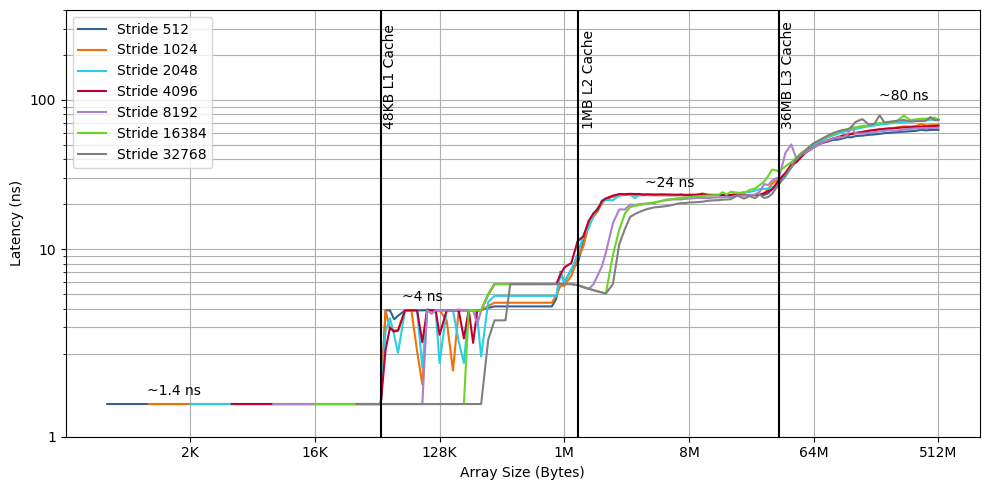

In [316]:
save =True;figname=f"{output_folder}/lmbench.pdf"
########### LMBench plot ###########
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
for k,v in sizes.items():
    plt.plot(v, latencies[k], label=f"Stride {k}")

hmax = 400
div = 6
plt.vlines(l1_size, ymin=0, ymax=hmax, color="k" )
plt.text(l1_size + 1500, hmax/div, f"{human_readable(l1_size, bytes=True)}B L1 Cache", rotation=90)
plt.vlines(l2_size, ymin=0, ymax=hmax, color="k" )
plt.text(l2_size + 100500, hmax/div, f"{human_readable(l2_size, bytes=True)}B L2 Cache", rotation=90)
plt.vlines(l3_size, ymin=0, ymax=hmax, color="k" )
plt.text(l3_size + 1000000, hmax/div, f"{human_readable(l3_size, bytes=True)}B L3 Cache", rotation=90)

offset=0.5
hlx=0.005
# plt.hlines(1.4, xmin=0, xmax=1e9, color="k")
plt.text(1e3, T_l1 + 0.1, f"~{T_l1} ns")
# plt.hlines(4, xmin=0, xmax=1e9, color="gray")
plt.text(70e3, T_l2 + offset, f"~{T_l2} ns")
# plt.hlines(24, xmin=0, xmax=1e9, color="gray")
plt.text(4e6, T_l3 + 2, f"~{T_l3} ns")
# plt.hlines(80, xmin=0, xmax=1e9, color="gray")
plt.text(200e6, T_mem + 20, f"~{T_mem} ns")

plt.legend()

plt.xlabel("Array Size (Bytes)")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x), bytes=True)}"))# 
# plt.xlim([0.0005, 32])
# plt.ticklabel_format(axis='x', style='plain')

plt.ylabel("Latency (ns)")
plt.yscale("symlog")
plt.ylim([1, hmax])
yaxis = plt.gca().yaxis
yaxis.set_minor_locator(MinorSymLogLocator(1e-1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
plt.grid(True, which="both")

# plt.title("LMBench results of memory read latency with different strides and array sizes on ")
plt.tight_layout()
if save: plt.savefig(figname,format="pdf")
plt.show()

## Microbenchmark Data

In [317]:
filename = f"{mb_input_folder}/cpu_calibration.json" 
# filename = "../das6-cpu-microbenchmark.result" 

with open(filename, "r") as f:
    jdata = json.load(f)
bm_df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time" : float})

convert_to_type(bm_df, "real_time", np.float64)
bm_df["func_name"] = bm_df["name"].apply(lambda s: s.split("/")[0][3:])    
del bm_df["family_index"], bm_df["per_family_instance_index"]

bm_df.head(10)

,name,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,bin,nbins,val,aggregate_name,aggregate_unit,dim,func_name
0,BM_BinarySearch/8/0,BM_BinarySearch/8/0,iteration,1000000.0,0.0,1,429,1.635215,1.633970,ms,0.0,1.0,0.0,NaN,NaN,NaN,BinarySearch
1,BM_BinarySearch/8/0,BM_BinarySearch/8/0,iteration,1000000.0,1.0,1,429,1.631299,1.630067,ms,0.0,1.0,0.0,NaN,NaN,NaN,BinarySearch
2,BM_BinarySearch/8/0,BM_BinarySearch/8/0,iteration,1000000.0,2.0,1,429,1.626256,1.624881,ms,0.0,1.0,0.0,NaN,NaN,NaN,BinarySearch
3,BM_BinarySearch/8/0_mean,BM_BinarySearch/8/0,aggregate,1000000.0,NaN,1,3,1.630923,1.629640,ms,0.0,1.0,0.0,mean,time,NaN,BinarySearch
4,BM_BinarySearch/8/0_median,BM_BinarySearch/8/0,aggregate,1000000.0,NaN,1,3,1.631299,1.630067,ms,0.0,1.0,0.0,median,time,NaN,BinarySearch
5,BM_BinarySearch/8/0_stddev,BM_BinarySearch/8/0,aggregate,0.0,NaN,1,3,0.004491,0.004559,ms,0.0,0.0,0.0,stddev,time,NaN,BinarySearch
6,BM_BinarySearch/8/0_cv,BM_BinarySearch/8/0,aggregate,0.0,NaN,1,3,0.002754,0.002798,ms,NaN,0.0,NaN,cv,percentage,NaN,BinarySearch
7,BM_BinarySearch/16/0,BM_BinarySearch/16/0,iteration,1000000.0,0.0,1,231,3.005437,3.003250,ms,0.0,2.0,0.0,NaN,NaN,NaN,BinarySearch
8,BM_BinarySearch/16/0,BM_BinarySearch/16/0,iteration,1000000.0,1.0,1,231,3.019714,3.017523,ms,0.0,2.0,0.0,NaN,NaN,NaN,BinarySearch
9,BM_BinarySearch/16/0,BM_BinarySearch/16/0,iteration,1000000.0,2.0,1,231,3.024682,3.022502,ms,0.0,2.0,0.0,NaN,NaN,NaN,BinarySearch


# Find Bin

## Design

In [318]:
def T_bscm(cache_size, sub_size, nbins):
    return (np.log2(sub_size) - 
            np.log2( cache_size-( np.log2(nbins)/(np.log2(sub_size) + 1) ) ) 
            + 1).clip(0)
    
def T_binsearch(nbins, subsize):
    return (np.log2(nbins) * T_l1 
        + T_bscm(l1_size/8, subsize, nbins) * T_l2 + T_bscm(l2_size/8, subsize, nbins) * T_l3
        +  T_bscm(l3_size, subsize, nbins) * T_mem)
    
def T_findbin(edges, nbins, subsize):
    if edges:
        return T_binsearch(nbins, subsize)
    else:
        try: 
            return np.repeat(T_fixedsearch, len(nbins))
        except:
            return T_fixedsearch

## Calibration

In [319]:
fxs_df = bm_df[bm_df["func_name"] == "FixedSearch"].copy()
fxs_mean = fxs_df.loc[fxs_df["name"].str.contains("mean")]
fxs_std = fxs_df.loc[fxs_df["name"].str.contains("stddev")]
fxs_mean

,name,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,bin,nbins,val,aggregate_name,aggregate_unit,dim,func_name
913,BM_FixedSearch/manual_time_mean,BM_FixedSearch/manual_time,aggregate,1000000.0,NaN,1,3,16.729587,47.632055,ms,-2.147484e+09,NaN,NaN,mean,time,NaN,FixedSearch


## Validation

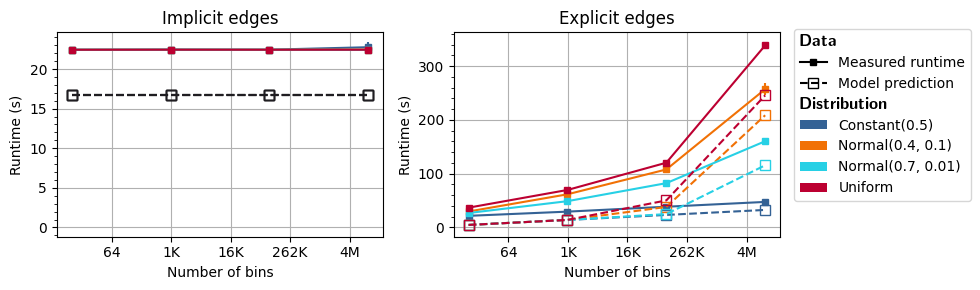

In [320]:
save = True; figname= f"{output_folder}/cpu_findbin_validation.pdf"
####### nbins vs nvals, distr subplots ###########

selected_env = "CPU" 
selected_bulksize = 32768
selected_nvals = 1e9
unit = "s"

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(121)

# Legend Labels
plot_validation_labels()
ax.set_title("Implicit edges")

for di, distr in enumerate(unique_distribution):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, False
    avg = gp_ivd.mean().loc[arg]
    std = gp_ivd.std().loc[arg]
    
    p = ax.errorbar(unique_nbins, avg["tfindbin"], 
                     yerr=std["tfindbin"], 
                     **bm_style,
                )
    

    # Legend Labels
    ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                 facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))

    ## prediction
    subsize = get_subsize(distr, unique_nbins)
    pred = T_findbin(False, unique_nbins, subsize) * unit_to_unit_factor("ns", unit) * selected_nvals 
    ax.errorbar(unique_nbins, pred, 
                 c=pred_color, **pred_nocolor_style
                )


plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))

plt.ylabel("Runtime (s)")
yaxis = plt.gca().yaxis
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

##############3
ax = plt.subplot(122)

# Legend Labels
plot_validation_labels()
ax.set_title("Explicit edges")
for di, distr in enumerate(unique_distribution):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, True
    avg = gp_ivd.mean().loc[arg]
    std = gp_ivd.std().loc[arg]
    
    p = ax.errorbar(unique_nbins, avg["tfindbin"], 
                     yerr=std["tfindbin"], 
                    **bm_style,
                )
    

    # Legend Labels
    ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                 facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))

    ## prediction
    c=p[0].get_color()
    subsize = get_subsize(distr, unique_nbins)
    pred = T_findbin(True, unique_nbins, subsize) * unit_to_unit_factor("ns", unit) * selected_nvals     
    ax.errorbar(unique_nbins, pred,
                 c=c, **pred_nocolor_style
                )

    # observ = avg["tfindbin"].values
    # print(distr, pred, mae(pred, observ), r2(pred, observ) * 100)

plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))

plt.ylabel("Runtime (s)")
# plt.yscale("symlog")
# plt.ylim([0,1000])
yaxis = plt.gca().yaxis
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

##########
hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")

legend = fig.legend(hndls, lbls, loc='center left', bbox_to_anchor=(0.99, 0.6),
                    handler_map={str: LegendTitle({'fontsize':12})})

plt.tight_layout()
plt.savefig(figname, format="pdf", bbox_inches='tight')
plt.show()

# Add Bin Content

## Design

In [321]:
def T_fill(nbins, subsize):
    l1_miss = (np.array(subsize) > l1_size/8).astype(np.int64)
    l2_miss = (np.array(subsize) > l2_size/8).astype(np.int64)
    l3_miss = (np.array(subsize) > l3_size/8).astype(np.int64)
    return  (
         T_l1 
        + l1_miss * T_l2 
        + l1_miss * l2_miss * T_l3
        + l1_miss * l2_miss * l3_miss * T_mem
    )

## Calibration

In [322]:
#

## Validation

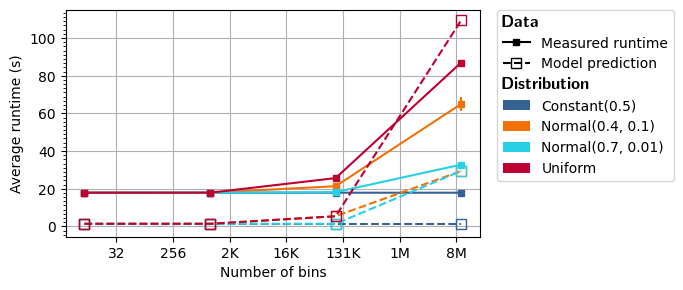

In [323]:
save=True; figname=f"{output_folder}/cpu_addbincontent_validation.pdf"

selected_env = "CPU" 
selected_bulksize = 32768
selected_nvals = 1e9
selected_distr = sorted(unique_distribution)
selected_edges = False

fig = plt.figure(figsize=(5, 3))
ax = plt.subplot(111)

# Legend Labels
plot_validation_labels()

for di,distr in enumerate(selected_distr):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, selected_edges
    avg = gp_ivd.mean().loc[arg]
    std = gp_ivd.std().loc[arg]
    
    p = ax.errorbar(unique_nbins, avg["tfill"], 
                     yerr=std["tfill"], 
                     **bm_style
                )
    

    # Legend Labels
    ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                 facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))

    
    subsize = get_subsize(distr, unique_nbins)
    pred =  T_fill(unique_nbins, subsize) * selected_nvals * unit_to_unit_factor("ns", "s") 
    ax.errorbar(unique_nbins, pred, 
                c=p[0].get_color(), **pred_nocolor_style
                )

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
legend = fig.legend(hndls, lbls, loc='center left', bbox_to_anchor=(0.99, 0.665),
                    handler_map={str: LegendTitle({'fontsize':12})})

plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))

plt.ylabel("Average runtime (s)")
yaxis = plt.gca().yaxis
yaxis.set_minor_locator(MinorSymLogLocator(1e-1))
ax.grid(True, which="major")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

plt.tight_layout()
if save: plt.savefig(figname, format="pdf", bbox_inches='tight')
plt.show()

# Update Stats

## Design

In [324]:
# 

## Calibration

In [325]:
usb_df = bm_df[bm_df["func_name"] == "UpdateStats"].copy()
usb_mean = usb_df.loc[usb_df["name"].str.contains("mean")]
usb_std = usb_df.loc[usb_df["name"].str.contains("stddev")]
usb_mean

,name,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,bin,nbins,val,aggregate_name,aggregate_unit,dim,func_name
920,BM_UpdateStats/1/manual_time_mean,BM_UpdateStats/1/manual_time,aggregate,1000000.0,NaN,1,3,19.433894,59.033994,ms,NaN,NaN,NaN,mean,time,1.0,UpdateStats


In [326]:
T_updatestats = (
    usb_mean.loc[usb_mean["dim"] == 1]["real_time"] * 
    unit_to_unit_factor(usb_mean["time_unit"].values[0], "ns") / 
    usb_mean["repetitions"].values[0] 
).values[0]
T_updatestats

19.433893555676768

## Validation

In [327]:
unique_nvals

array([5.e+07, 1.e+08, 5.e+08, 1.e+09])

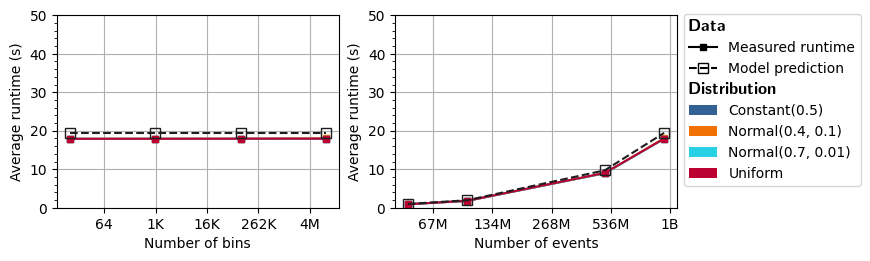

In [328]:
save = True; figname=f"{output_folder}/cpu_updatestats_validation.pdf"

selected_env = "CPU" 
selected_bulksize = 32768
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = sorted(unique_distribution)
selected_edges = False

fig = plt.figure(figsize=(8, 2.5))
ax = plt.subplot(121)

for di,distr in enumerate(selected_distr):
    arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, selected_edges
    avg = gp_ivd.mean().loc[arg]
    std = gp_ivd.std().loc[arg]
    
    p = ax.errorbar(unique_nbins, avg["tstats"], 
                     yerr=std["tstats"], 
                     **bm_style,
                )

# print(distr)
pred = np.repeat(T_updatestats * selected_nvals * unit_to_unit_factor("ns", "s"), len(unique_nbins))
ax.errorbar(unique_nbins, 
            pred, 
            c=pred_color,
            marker="s", markerfacecolor="none", ls="--", markersize=7,
)
# observ = avg["tstats"].values
# print("MAE:", mae(pred, observ))
# print("R2:", r2(pred, observ) * 100)
    
plt.xlabel("Number of bins")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
plt.ylim([0, 50])
plt.ylabel("Average runtime (s)")

###############

ax = plt.subplot(122)
plot_validation_labels()

for di,distr in enumerate(selected_distr):
    arg = selected_env, distr, unique_nvals, selected_nbins, selected_bulksize, selected_edges
    avg = gp_ivd.mean().loc[arg]
    std = gp_ivd.std().loc[arg]
    
    p = ax.errorbar(unique_nvals, avg["tstats"], 
                     yerr=std["tstats"], 
                     **bm_style,
                )

    # Legend Labels
    ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                 facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))
    
pred = T_updatestats * unique_nvals * unit_to_unit_factor("ns", "s")
ax.errorbar(unique_nvals, 
            pred, 
            c=pred_color,
            **pred_nocolor_style,
)
# observ = avg["tstats"].values
# print("MAE:", mae(pred, observ))
# print("R2:", r2(pred, observ) * 100)
    
plt.xlabel("Number of events")
plt.ylabel("Average runtime (s)")
plt.xscale("log", base=2)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))

plt.ylim([0, 50])

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")

legend = fig.legend(hndls, lbls, loc='center left', bbox_to_anchor=(0.9, 0.54),
                    handler_map={str: LegendTitle({'fontsize':12})})

if save: plt.savefig(figname, format="pdf", bbox_inches='tight')
plt.show()

# Total Validation

## Total vs. inner timings

In [329]:
unique_bulksize

array([1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
       4.09600000e+03, 3.27680000e+04, 2.62144000e+05, 8.19200000e+03,
       1.63840000e+04, 6.55360000e+04, 1.31072000e+05, 2.09715200e+06,
       1.67772160e+07, 1.34217728e+08])

In [330]:
inner_validation_df["bulksize"].unique()

array([     1,      8,     64,    512,   4096,  32768, 262144])

In [331]:
ivd_unique_bulksize = np.array([v for v in unique_bulksize if v in inner_validation_df["bulksize"].unique()])
ivd_unique_bulksize

array([1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
       3.27680e+04, 2.62144e+05])

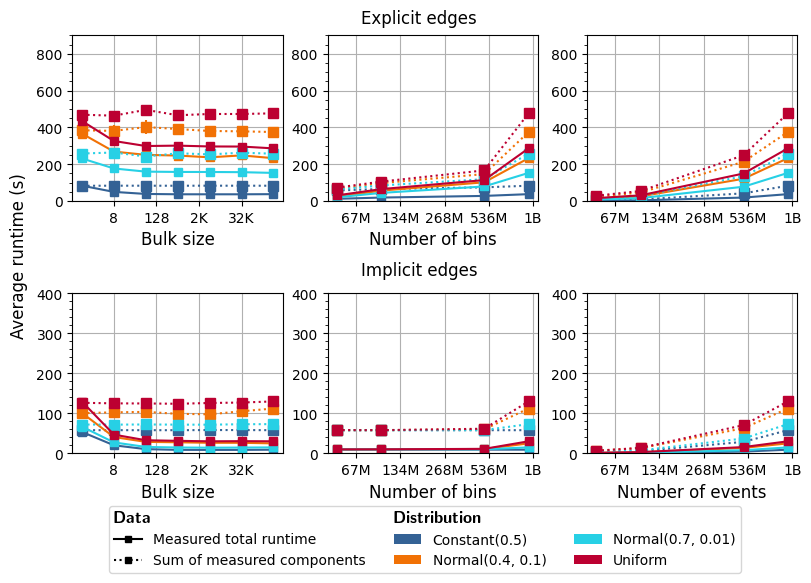

In [332]:
save = True; figname = f"{output_folder}/cpu_total_vs_inner.pdf"
selected_env = "CPU" 
selected_bulksize = 262144
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = unique_distribution

# fig = plt.figure(figsize=(8, 5))
fig = plt.figure(constrained_layout=True, figsize=(8,5))
(subfig1, subfig2) = fig.subfigures(2, 1) # create 2x1 subfigures
(ax1, ax2,ax3) = subfig1.subplots(1, 3)       # create 1x2 subplots on subfig1
(ax4, ax5,ax6) = subfig2.subplots(1, 3)       # create 1x2 subplots on subfig2
axes = [ax1,ax2,ax3,ax4,ax5,ax6]

hmax = 900
for edi, edg in enumerate([True, False]):
    ax = axes[edi*3]
    for di,distr in enumerate(selected_distr):
        arg = selected_env, distr, selected_nvals, selected_nbins, ivd_unique_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(ivd_unique_bulksize, ttotal_avg, yerr=ttotal_std, 
                     marker="s", ecolor="k", 
                     # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                     # label=f"{distr} total"
                    )
        tfill_avg = gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = gp_ivd.mean().loc[arg]["tstats"]
        tusb_std = gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(ivd_unique_bulksize, 
                         tfill_avg + tusb_avg + tfindbin_avg, 
                         yerr=tfill_std + tusb_std + tfindbin_std, 
                         color=p[0].get_color(), **sum_style,
                        )

    ax.set_xlabel("Bulk size", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    ax.set_ylim([0,hmax - (not edg) * 500])
    # plt.ylabel("Average runtime (s)")
    
    ###########
    ax = axes[edi*3+1]
    for di,distr in enumerate(selected_distr):
        arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(unique_nvals, ttotal_avg, yerr=ttotal_std, 
                     marker="s", ecolor="k", 
                     # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                     # label=f"{distr} total"
                    )
        tfill_avg = gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = gp_ivd.mean().loc[arg]["tstats"]
        tusb_std = gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(unique_nvals, 
                         tfill_avg + tusb_avg + tfindbin_avg, 
                         yerr=tfill_std + tusb_std + tfindbin_std, 
                         color=p[0].get_color(), **sum_style
                        )

    ax.set_xlabel("Number of bins", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    # plt.ylim([0, 50])
    ax.set_ylim([0,hmax - (not edg) * 500])
    # plt.ylabel("Average runtime (s)")
    
    ###########
    ax = axes[edi*3+2]
    ax.plot(0,0, label="Measured total runtime", c="k", marker="s", markersize=5)
    ax.plot(0,0, label="Sum of measured components", c="k", marker="s", ls=":",  markersize=5)
    for di,distr in enumerate(selected_distr):
        arg = selected_env, distr, unique_nvals, selected_nbins, selected_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = ax.errorbar(unique_nvals, ttotal_avg, yerr=ttotal_std, 
                     marker="s", ecolor="k", 
                     # label=f"{distr} bin{'s' if int(nb) > 1 else ''}"
                     # label=f"{distr} total"
                    )
        
        tfill_avg = gp_ivd.mean().loc[arg]["tfill"]
        tfill_std = gp_ivd.std().loc[arg]["tfill"]
        tusb_avg = gp_ivd.mean().loc[arg]["tstats"]
        tusb_std = gp_ivd.std().loc[arg]["tstats"]
        tfindbin_avg = gp_ivd.mean().loc[arg]["tfindbin"]
        tfindbin_std = gp_ivd.std().loc[arg]["tfindbin"]
        p = ax.errorbar(unique_nvals, 
                         tfill_avg + tusb_avg + tfindbin_avg, 
                         yerr=tfill_std + tusb_std + tfindbin_std, 
                         color=p[0].get_color(), **sum_style,
                        )    
        # Legend Labels
        ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                     facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))

    plt.xlabel("Number of events", fontsize=12)
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    
    ax.set_ylim([0,hmax - (not edg) * 500])

# ax = plt.subplot(221)
subfig1.suptitle("Explicit edges", fontsize=12)
subfig2.suptitle("Implicit edges", fontsize=12)
# ax = plt.subplot(223)
# fig.subplots_adjust(wspace=0.2, hspace=0.5) 

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")
hndls.insert(6, "")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
lbls.insert(6, "")
legend = fig.legend(hndls, lbls, loc='lower left', bbox_to_anchor=(0.12, -0.15), ncols=3,
                    handler_map={str: LegendTitle({'fontsize':12})})

fig.supylabel('Average runtime (s)')
# plt.tight_layout()
if save: plt.savefig(figname, format="pdf", bbox_inches='tight')

plt.show()

## Runtime

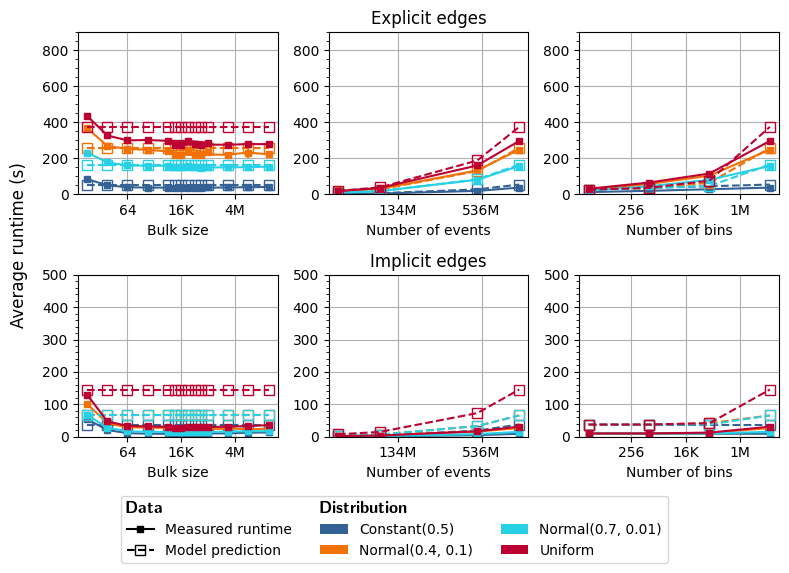

In [333]:
save = True; figname =f"{output_folder}/cpu_validation_das6.pdf"
selected_env = "CPU" 
selected_bulksize = 32768
selected_nbins = 10e6
selected_nvals = 1e9
selected_distr = unique_distribution
edg = True

fig = plt.figure(figsize=(8, 5))
hmax_exp = 600
hdifd_imp = 400

for edi, edg in enumerate([True, False]):
    ax = plt.subplot(2, 3, edi*3+1)
    
    for distr in unique_distribution:
        arg = selected_env, distr, selected_nvals, selected_nbins, unique_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_bulksize, ttotal_avg, yerr=ttotal_std, 
                         **bm_style                    )
    
        # Predicition in nanoseconds!
        subsize = get_subsize(distr, selected_nbins)
        tfill_pred = T_fill(selected_nbins, subsize)
        tfindbin_pred = T_findbin(edg, selected_nbins, subsize)
        tusb_pred = T_updatestats
        plt.errorbar(unique_bulksize, 
                         np.repeat((tfill_pred + tusb_pred + tfindbin_pred) * selected_nvals * unit_to_unit_factor("ns", "s"), 
                                   len(unique_bulksize)), 
                         color=p[0].get_color(), **pred_nocolor_style
                        )
        
    plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    plt.xlabel("Bulk size")
        
    plt.ylim([0,hmax - (not edg) * hdifd_imp])
    # plt.ylabel("a")
    #######################################################
    ax = plt.subplot(2, 3, edi*3+2)
    
    # Legend Labels
    ax.plot(0,0, label="Measured total runtime", c="k", marker="s", markersize=5)
    plt.plot(0,0, label="Model prediction", c="k", marker="s", markersize=7, markerfacecolor='none')
    for distr in unique_distribution:
        arg = selected_env, distr, unique_nvals, selected_nbins, selected_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_nvals, ttotal_avg, yerr=ttotal_std, 
                         **bm_style                    )
    
        # In nanoseconds!
        subsize = get_subsize(distr, selected_nbins)
        tfill_pred = T_fill(selected_nbins, subsize)
        tfindbin_pred = T_findbin(edg, selected_nbins, subsize)
        tusb_pred = T_updatestats
        plt.errorbar(unique_nvals, 
                        (tfill_pred + tusb_pred + tfindbin_pred) * unique_nvals * unit_to_unit_factor("ns", "s"),
                         color=p[0].get_color(), **pred_nocolor_style
                        )
        
    plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    plt.xlabel("Number of events")
        
    plt.ylim([0,hmax - (not edg) * hdifd_imp])
    plt.title(f"{'Explicit' if edg else 'Implicit'} edges")
    #######################################################
    ax = plt.subplot(2, 3, edi*3+3)
    
    # Legend Labels
    plot_validation_labels()

    for distr in unique_distribution:
        arg = selected_env, distr, selected_nvals, unique_nbins, selected_bulksize, edg
        ttotal_avg = gp_vd.mean().loc[arg]["ttotal"]
        ttotal_std = gp_vd.std().loc[arg]["ttotal"]
        p = plt.errorbar(unique_nbins, ttotal_avg, yerr=ttotal_std, 
                         **bm_style
                    )

        # In nanoseconds!
        subsize = get_subsize(distr, unique_nbins)
        tfill_pred = T_fill(unique_nbins, subsize)
        tfindbin_pred = T_findbin(edg, unique_nbins, subsize)
        tusb_pred = T_updatestats
        plt.errorbar(unique_nbins, 
                         (tfill_pred + tusb_pred + tfindbin_pred) * selected_nvals * unit_to_unit_factor("ns", "s"), 
                           color=p[0].get_color(), **pred_nocolor_style
                        )
        
        # Legend Labels
        ax.add_patch(ptchs.Rectangle((0, 0), 0, 0, 
                                     facecolor=p[0].get_color(), label=f"{map_distr_name(distr)}"))
    
    plt.xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{human_readable(int(x))}"))
    plt.xlabel("Number of bins")

    plt.ylim([0,hmax - (not edg) * hdifd_imp])
        
#######################################################

hndls = ax.get_legend_handles_labels()[0]
hndls.insert(0, "Data")
hndls.insert(3, "Distribution")
hndls.insert(6, "")

lbls = ax.get_legend_handles_labels()[1]
lbls.insert(0, "")
lbls.insert(3, "")
lbls.insert(6, "")
legend = fig.legend(hndls, lbls, loc='lower left', bbox_to_anchor=(0.15, -0.15), ncols=3,
                    handler_map={str: LegendTitle({'fontsize':12})})

fig.supylabel('Average runtime (s)')

plt.tight_layout()
if save: plt.savefig(figname, format="pdf", bbox_inches='tight')

Plots the total time spent on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **different** number of **doubles**. Total time averaged over **3 runs**

In [334]:
selected_env = "CPU"
selected_bulksize = 1
selected_bins = unique_nbins
selected_nvals = 500000000
selected_distr = "uniform"
selected_edges = True

NameError: name 'gp_bm' is not defined

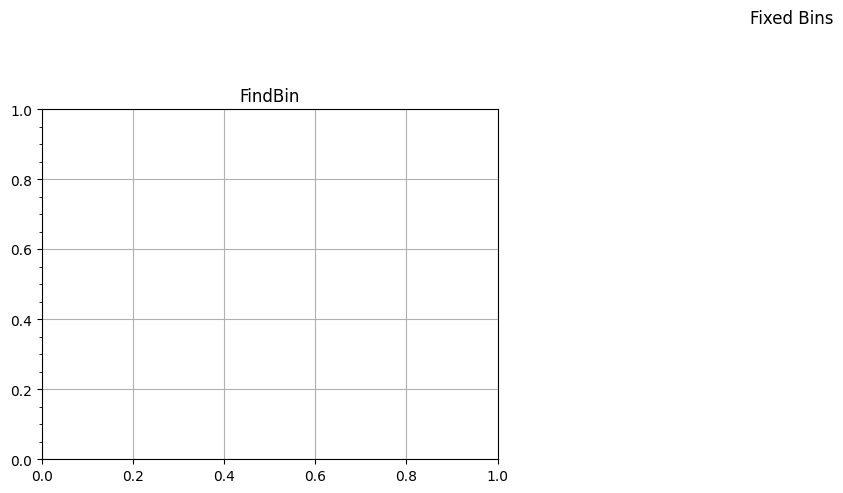

In [335]:
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins")

def plot_perval(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nv in unique_nvals:
        plt.errorbar(unique_nbins, 
                     gp_bm.mean().loc[selected_env, selected_distr, nv, :, selected_bulksize][col], 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, nv, :, selected_bulksize][col], 
                     marker="o", ecolor="k", label=f"{human_readable(nv)}")
    plt.xlabel(xlabel)
    plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_nvals, gp_bm.mean().loc[selected_env, selected_distr, :, nb, selected_bulksize][col], 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, :, nb, selected_bulksize][col], 
                     marker="o", ecolor="k", label=f"{human_readable(nb)}")
    plt.xlabel("Number of values")
    plt.ylim(ylim)
    plt.ylabel(ylabel)

ylim=[0,100]
plt.subplot(231)
plot_perval("FindBin", "tfindbin", "Number of bins",  "Total time (s)", ylim)

plt.subplot(232)
plot_perval("Fill", "tfill", "Number of bins",  "Total time (s)", ylim)

plt.subplot(233)
plot_perval("Update Stats", "tstats", "Number of bins",  "Total time (s)", ylim)
plt.legend(title="Number of values", loc='center left', bbox_to_anchor=(1, 0.5))

ylim = [0, 100]
plt.subplot(234)
plot_perbin("", "tfindbin", "Number of values",  "Total time (s)", ylim)

plt.subplot(235)
plot_perbin("", "tfill", "Number of values",  "Total time (s)", ylim)

plt.subplot(236)
plot_perbin("", "tstats", "Number of values",  "Total time (s)", ylim)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

Plots the *average* time spent *per value* on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **different** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins")

def plot_perval_normalized(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nv in unique_nvals:
        plt.errorbar(unique_nbins, gp_bm.mean().loc[selected_env, selected_distr, nv, :, selected_bulksize][col]/nv/norm, 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, nv, :, 1][col]/nv/norm, 
                     marker="o", capsize=2, label=f"{int(nv)}")
    plt.xlabel(xlabel)
    plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin_normalized(title, col, xlabel, ylabel, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_nvals, gp_bm.mean().loc[selected_env, selected_distr, :, nb, selected_bulksize][col]/unique_nvals/norm, 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, :, nb, selected_bulksize][col]/unique_nvals/norm, 
                     marker="o",  capsize=2, label=f"{int(nb)}")
    plt.xlabel("Number of values")
    plt.ylim(ylim)
    plt.ylabel("Average time per value (s)")

norm = 1e-9
ylim = [13, 20]
plt.subplot(231)
plot_perval_normalized("FindBin", "tfindbin", "Number of bins",  
                       "Average time per value (ns)", ylim, norm)

plt.subplot(232)
plot_perval_normalized("Fill", "tfill", "Number of bins",  
                       "Average time per value (ns)", ylim, norm)

plt.subplot(233)
plot_perval_normalized("Update Stats", "tstats", "Number of bins",  
                       "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of values", loc='center left', bbox_to_anchor=(1, 0.5))

ylim = [13, 20]
plt.subplot(234)
plot_perbin_normalized("", "tfindbin", "Number of values",  
                       "Average time per value (ns)", ylim, norm)

plt.subplot(235)
plot_perbin_normalized("", "tfill", "Number of values",  
                       "Average time per value (ns)", ylim, norm)

plt.subplot(236)
plot_perbin_normalized("", "tstats", "Number of values",  
                       "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### root plot

In [ ]:
%jsroot off

selected_env = "CPU"
selected_bulksize = 1
selected_bins = unique_nbins
selected_nvals = 500000000
selected_distr = "uniform"
selected_edges = True

c = ROOT.TCanvas("c1", "")
rmargin = 0.18
c.SetRightMargin(rmargin)
l = ROOT.TLegend(1.01-rmargin, 0.3, 1, 0.9)
l.SetHeader("Number of bins")
header = l.GetListOfPrimitives().First();
header.SetTextSize(0.05)

title=""
mg = ROOT.TMultiGraph("mg", title)
for nbi, nb in enumerate(selected_bins):
    g = ROOT.TGraphErrors(len(unique_nvals), unique_nvals, 
                          gp_bm.mean().loc[selected_env, selected_distr, :, nb, selected_bulksize]
                                          ["tfindbin"].values/unique_nvals/norm,
                          ROOT.kNone,
                          gp_bm.std().loc[selected_env, selected_distr, :, nb, selected_bulksize]
                                          ["tfindbin"].values/unique_nvals/norm)
    g.SetMarkerStyle(20 + nbi)
    g.SetLineWidth(3)
    mg.Add(g, "PL")
    l.AddEntry(g, str(nb))
mg.Draw("A PLC PMC")

xaxis = mg.GetXaxis()
xaxis.SetTitle("Number of values")

yaxis = mg.GetYaxis()
yaxis.SetTitle("Average time per values (ns)")

l.Draw()
c.SaveAs("findbin_benchmark.pdf")
c.DrawClone()

In [ ]:
filename = "nonbulk_1d_varbins.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_type(df_bm, "tfindbin", np.float64)
convert_to_type(df_bm, "tfill", np.float64)
convert_to_type(df_bm, "tstats", np.float64)
del df_bm["input"]
df_bm.head(7)

In [ ]:
gp_bm = df_bm.groupby(["env", "distribution", "nvals", "nbins", "bulksize"])
gp_bm.mean()

In [ ]:
unique_nbins = df_bm["nbins"].unique().astype(np.float64)
unique_nvals = df_bm["nvals"].unique().astype(np.float64)
unique_bulksize = df_bm["bulksize"].unique().astype(np.float64)
unique_nbins, unique_nvals, unique_bulksize

Plots the *average* time spent *per value* on finding bins, filling bins, and updating stats for **1D** histograms with **fixed bins**, **different** number of bins and **0.5B** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
plt.figure(figsize=(20,5))
plt.suptitle("Variable Bins")

norm=1
ylim = [0*1e-8, 5.5*1e-8]
plt.subplot(131)
plot_perval_normalized("FindBin", "tfindbin", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(132)
plot_perval_normalized("Fill", "tfill", "Number of bins",  "Average time per value (ns)", ylim, norm)

plt.subplot(133)
plot_perval_normalized("Update Stats", "tstats", "Number of bins",  "Average time per value (ns)", ylim, norm)
plt.legend(title="Number of values", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
def convert_to_double_list(df, col):
    df[col] =  df[col].apply(lambda s: [np.float64(x) for x in s.split()])
    
filename = "nonbulk_1d_pervarbin.csv" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_double_list(df_bm, "tfindbin")
convert_to_double_list(df_bm, "tfill")
convert_to_type(df_bm, "tstats", np.float64)
del df_bm["input"]
df_bm.head(7)

Plots the *average* time spent on finding a specific bin in an array with **100** bins for **0.5B** number of **doubles**. Total time averaged over **3 runs**

In [ ]:
# w = 2400
# h = 900
# c = ROOT.TCanvas("c1", title, w, h)
# c.SetRightMargin(0.32)
# c.SetBottomMargin(0.33)
# c.Divide(2,1)

# l = ROOT.TLegend(0.7, 0.7, 0.96, 0.9)
# l.SetTextSize(0.05)

# g = ROOT.TGraph(100, np.arange(100, dtype=np.float64), gp_bm.agg(mean_list).loc["CPU", "uniform", 500000000, 100, 1]["tfindbin"][1:-1])
# g.SetMarkerSize(1)
# g.SetMarkerStyle(8)
# l.AddEntry(g, "Microbenchmark", "p")
# xaxis = g.GetXaxis()
# xaxis.SetTitle("Bin")
# yaxis = g.GetYaxis()
# yaxis.SetTitle(f"Time (ns)")
# xaxis.SetRangeUser(0, 100)

# c.cd(1)
# g.Draw("ALP")

# title="Time to find bin in an array with 100 bins"
# g.SetTitle(title)

# l.Draw()
# c.Draw()

Investigate caching within Histogram Filling

In [ ]:
filename = "das6-cpu/20231219-223056" 
df_bm = pd.read_csv(filename)
df_bm["nvals"] =  df_bm["input"].apply(lambda s: float(s.split("_")[-1].split(".")[0]))
df_bm["distribution"] =  df_bm["input"].apply(lambda s: s.split("_")[1])
convert_to_type(df_bm, "tfindbin", np.float64)
convert_to_type(df_bm, "tfill", np.float64)
convert_to_type(df_bm, "tstats", np.float64)
convert_to_type(df_bm, "edges", np.bool_)
del df_bm["input"]
df_bm.head(7)

In [ ]:
gp_bm = df_bm.groupby(["env", "distribution", "nvals", "nbins", "bulksize", "edges"])
gp_bm.mean()

In [ ]:
unique_nbins = df_bm["nbins"].unique().astype(np.float64)
unique_nvals = df_bm["nvals"].unique().astype(np.float64)
unique_bulksize = df_bm["bulksize"].unique().astype(np.float64)
unique_distribution = df_bm["distribution"].unique()
unique_edges = [True, False]
unique_nbins, unique_nvals, unique_bulksize

In [ ]:
selected_env = "CPU"
selected_bulksize = 32768
selected_bins = unique_nbins[:-1]
selected_nvals = 500000000
selected_distr = "constant-0"
selected_edges = True

def plot_perbulk_normalized(title, col, xlabel, ylabel, xlim, ylim, norm=1):
    plt.title(title)
    for bs in unique_bulksize:
        plt.errorbar(unique_nbins, 
                     gp_bm.mean().loc[selected_env, selected_distr, selected_nvals, :, bs, selected_edges][col]/norm, 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, selected_nvals, :, bs, selected_edges][col]/norm,
                     marker="o", capsize=3, label=f"{int(bs)}")
    plt.xlabel(xlabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.ylabel(ylabel)

def plot_perbin_normalized(title, col, xlabel, ylabel, xlim, ylim, norm=1):
    plt.title(title)
    for nb in unique_nbins:
        plt.errorbar(unique_bulksize, 
                     gp_bm.mean().loc[selected_env, selected_distr, selected_nvals, nb, :, selected_edges][col]/norm, 
                     yerr=gp_bm.std().loc[selected_env, selected_distr, selected_nvals, nb, :, selected_edges][col]/norm, 
                     marker="o", capsize=3, label=f"{int(nb)}")
    plt.xlabel(xlabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.ylabel(ylabel)
    
plt.figure(figsize=(20,10))
plt.suptitle("Fixed Bins with Bulk API")

norm=selected_nvals*1e-9
xlim = []
ylim = []
plt.subplot(231)
plot_perbulk_normalized("FindBin", "tfindbin", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(232)
plot_perbulk_normalized("Fill", "tfill", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(233)
plot_perbulk_normalized("Update Stats", "tstats", "Number of bins",  "Average time per value (ns)", xlim, ylim, norm)
plt.legend(title="Bulk size", loc='center left', bbox_to_anchor=(1, 0.5))

norm=1e-9
xlim = []
ylim = []
plt.subplot(234)
plot_perbin_normalized("", "tfindbin", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(235)
plot_perbin_normalized("", "tfill", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)

plt.subplot(236)
plot_perbin_normalized("", "tstats", "Bulk size",  "Average time per value (ns)", xlim, ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Plot average total time. **Note that this timing includes overhead of timers for the measurements above**

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Fixed Bins")

norm=1
xlim = []
ylim = []
plt.subplot(111)
plot_perbin_normalized("Total runtime on CPU with bulk API", "ttotal", "Bulk Size", "Total runtime (s)", xlim, ylim, norm)
plt.legend(title="Number of bins", loc='center left', bbox_to_anchor=(1, 0.5))

**ROOT plot** Plot average time per value for different number of bins

In [ ]:
%jsroot off

selected_env = "CPU"
selected_bulksize = 32768
selected_bins = unique_nbins
selected_distr = "constant-0.5"
selected_edges = True
norm = unique_nvals/1e9

c = ROOT.TCanvas("c1", "")
rmargin = 0.2
c.SetRightMargin(rmargin)
l = ROOT.TLegend(1.01-rmargin, 0.55, 1, 0.9)
l.SetHeader("Number of bins")
header = l.GetListOfPrimitives().First();
header.SetTextSize(0.05)

title=""
mg = ROOT.TMultiGraph("mg", title)
for nbi, nb in enumerate(selected_bins):
    g = ROOT.TGraphErrors(len(unique_nvals), unique_nvals, 
                          gp_bm.mean().loc[selected_env, selected_distr, :, nb, selected_bulksize, selected_edges]
                                          ["tfindbin"].values/norm,
                          ROOT.kNone,
                          gp_bm.std().loc[selected_env, selected_distr, :, nb, selected_bulksize, selected_edges]
                                          ["tfindbin"].values/norm)
    g.SetMarkerStyle(20 + nbi)
    g.SetLineWidth(3)
    mg.Add(g, "PL")
    l.AddEntry(g, human_readable(nb))
mg.Draw("A PLC PMC")

xaxis = mg.GetXaxis()
xaxis.SetTitle("Number of values")

yaxis = mg.GetYaxis()
yaxis.SetTitle("Average time per values (ns)")

l.Draw()
c.SaveAs("../../images/findbin_nvals_vs_nbins.pdf")
c.DrawClone()

In [ ]:
%jsroot off

selected_env = "CPU"
selected_bulksize = 32768
selected_bins = []
selected_distr = "constant-0.5"
selected_edges = True
selected_nvals = 500e6
norm = selected_nvals*1e-9

c = ROOT.TCanvas("c1", "")
rmargin = 0.2
c.SetRightMargin(rmargin)
l = ROOT.TLegend(1.01-rmargin, 0.55, 1, 0.9)
l.SetHeader("Input type")
header = l.GetListOfPrimitives().First();
header.SetTextSize(0.05)

title=""
mg = ROOT.TMultiGraph("mg", title)
for (nbi, dis), lbl in zip(enumerate(unique_distribution), ["Uniform", "Bin 0", "Middle bin"]):
    g = ROOT.TGraphErrors(len(unique_nbins), unique_nbins, 
                          gp_bm.mean().loc[selected_env, dis, selected_nvals, :, selected_bulksize, selected_edges]
                                          ["tfindbin"].values/norm,
                          ROOT.kNone,
                          gp_bm.std().loc[selected_env, dis, selected_nvals, :, selected_bulksize, selected_edges]
                                          ["tfindbin"].values/norm)
    g.SetMarkerStyle(20 + nbi)
    g.SetLineWidth(3)
    mg.Add(g, "PL")
    l.AddEntry(g, str(dis).title())
mg.Draw("A PLC PMC")

xaxis = mg.GetXaxis()
xaxis.SetTitle("Number of bins")
# c.SetLogx()
0000
yaxis = mg.GetYaxis()
yaxis.SetTitle("Average time per values (ns)")

l.Draw()
c.SaveAs("../../images/findbin_nbins_vs_distr.pdf")
c.DrawClone()

In [ ]:
filename = "../microbenchmarks/das6-cpu/gbenchmark_evaluation.json" 
with open(filename, "r") as f:
    jdata = json.load(f)
bm_df = pd.DataFrame.from_dict(jdata["benchmarks"]).astype({"real_time" : float})

convert_to_type(df, "real_time", np.float64)
bm_df["func_name"] = bm_df["name"].apply(lambda s: s.split("/")[0][3:])
bm_df["time_factor"] = bm_df["time_unit"].apply(convert_unit)
# bm_df["time (s)"] = bm_df["real_time"] * bm_df["time_unit"].apply(convert_unit)
del bm_df["family_index"], bm_df["per_family_instance_index"]

gbm_df = bm_df.loc[bm_df["name"].str.contains("Search")].copy()
n_param = len(gbm_df["name"].values[0].split("/")) - 1
for i in range(n_param):
    if i == n_param - 1:
        gbm_df[f"param_{i}"] = gbm_df["name"].apply(lambda s: s.split("/")[i+1].split("_")[0])
    else:
        gbm_df[f"param_{i}"] = gbm_df["name"].apply(lambda s: s.split("/")[i+1])

gbm_mean = gbm_df.loc[gbm_df["name"].str.contains("mean")]
gbm_std = gbm_df.loc[gbm_df["name"].str.contains("stddev")]
gbm_mean

In [ ]:
%jsroot off

selected_nbins = gbm_mean["nbins"].unique().astype(np.float64)
selected_bin = gbm_mean["bin"].unique().astype(np.float64)
selected_val = gbm_mean["bin"].unique().astype(np.float64)
selected_func = gbm_mean["func_name"].unique()

c = ROOT.TCanvas("c1", "")
rmargin = 0.35
bmargin = 0
c.SetRightMargin(rmargin)
# c.SetBottomMargin(bmargin)
l = ROOT.TLegend(1.01-rmargin,0.55, 1, 0.9)
l.SetTextSize(0.05)
l.SetHeader("#bf{Performance Counter}")

title=""
mg = ROOT.TMultiGraph("mg", title)
for ev in [
           # "INSTRUCTIONS", 
           "L1-dcache-load-misses", 
           "L1-dcache-loads",
           "cache-misses",
           "cache-references"]:
    avg = np.array(gbm_mean[ev] / gbm_mean["repetitions"])
    g = ROOT.TGraphErrors(len(selected_nbins), selected_nbins, 
                          avg,
                          ROOT.kNone,
                          ROOT.kNone)
    g.SetMarkerStyle(20 + nbi)
    g.SetLineWidth(3)
    mg.Add(g, "PL")
    l.AddEntry(g, ev.title())      

mg.Draw("A PLC PMC")

xaxis = mg.GetXaxis()
xaxis.SetTitle("Array Size")
# xaxis.SetRangeUser(1, 10000000);
# c.SetLogx()
# c.SetLogy()

yaxis = mg.GetYaxis()
yaxis.SetTitle("Count")
# yaxis.SetTitle("Total time (s)")columnscolumnscolumnscolumns

l.Draw()      
# c.SaveAs("../../images/mb_findbin_nbins_vs_bin.pdf")
c.DrawClone()

In [ ]:
selected_val = "0"
avg_df = gbm_mean.loc[gbm_mean["param_1"] == selected_val]
std_df = gbm_std.loc[gbm_std["param_1"] == selected_val]

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
norm = 1e3

for ev, clr, mrkr in [
           ["INSTRUCTIONS", "k", "o"],
           ["L1-dcache-loads", "k", "v"],
           ["L1-dcache-load-misses", "k", "v"],
           ["cache-references", "k", "x"],
           ["cache-misses", "k", "x"],
]:
    avg = np.array(avg_df[ev] / avg_df["repetitions"])
    std = np.array(std_df[ev] / std_df["repetitions"])
    ax.errorbar((avg_df["nbins"]*8)/norm, avg, label=ev.title(), ls=("-" if not "miss" in ev else "--"), 
                 c=clr, marker=mrkr, yerr=std, markersize=8)


hmin, hmax = ax.get_ylim()
# hmin, hmax = 1e-8, 1e8
div = 1.4
l1_size
vclr="tab:red"
plt.vlines(l1_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l1_size/norm - 7, hmax/div, "32KB L1 Cache", rotation=90, color=vclr)
plt.vlines(l2_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l2_size/norm - 140, hmax/div, "512KB L2 Cache", rotation=90, color=vclr)
plt.vlines(l3_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l3_size/norm - 3900, hmax/div, "16MB L3 Cache", rotation=90, color=vclr)

plt.xlabel("Array Size (KB)")
# plt.ylabel(f"Benchmarked time ({bm_mean['time_unit'][0]})")
plt.ylabel(f"Average count")
plt.xscale("log", base=2)
# plt.yscale("log")
plt.ylim([0, hmax])
# plt.xlim([0.0005, 32])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
# plt.ticklabel_format(axis='x', style='plain')

plt.legend(loc="upper left")
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
unit = "ns"
# ax2.set_ylim(
#     bottom=0,
    # top=,
# )
ax2.set_ylabel(f"Average runtime ({unit})", color=color)
# ax2.set_yscale("log")
avg = np.array(avg_df["real_time"] / avg_df["repetitions"]) * unit_to_unit_factor(avg_df['time_unit'].values[0], unit)
std = np.array(std_df["real_time"] / std_df["repetitions"])
ax2.errorbar((avg_df["nbins"]*8)/norm, avg, label=ev.title(),
              c=color, marker="s", yerr=std, markersize=5)
ax2.tick_params(axis='y', labelcolor=color)


# plt.grid()
# plt.title("LMBench results of memory read latency with different strides and array sizes on ")
plt.tight_layout()
# plt.savefig("../../images/linsearch_perfcnt_vs_size.pdf",format="pdf", bbox_inches='tight')
plt.show()

In [ ]:
selected_val = gbm_mean["param_1"].unique()
# selected_val = ["0", "2", "4"]

fig = plt.figure(figsize=(10, 5))
gs =  gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax = plt.subplot(gs[0])
norm = 1e3

colors = cm.tab10(np.arange(len(selected_val)))
for vi, val in enumerate(selected_val):
    for ev, clr, mrkr in [
               ["INSTRUCTIONS", "k", "o"],
               ["L1-dcache-loads", "k", "v"],
               ["L1-dcache-load-misses", "k", "v"],
               ["cache-references", "k", "x"],
               ["cache-misses", "k", "x"],
    ]:
        if vi == 0:
            ax.errorbar(0,0, label=ev.title(), ls=("-" if not "miss" in ev else "--"), 
                    c=clr, marker=mrkr, markersize=8)
        
        avg_df = gbm_mean.loc[gbm_mean["param_1"] == val]
        std_df = gbm_std.loc[gbm_std["param_1"] == val]
        avg = np.array(avg_df[ev] / avg_df["repetitions"])
        std = np.array(std_df[ev] / std_df["repetitions"])
        p = ax.errorbar((avg_df["nbins"]*8)/norm, avg, c=colors[vi],
                        ls=("-" if not "miss" in ev else "--"), 
                        marker=mrkr, yerr=std, markersize=8)


hmin, hmax = ax.get_ylim()
# hmin, hmax = 1e-8, 1e8
div = 1e1
vclr="k"
plt.vlines(l1_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l1_size/norm - 13, div, "32KB L1 Cache", rotation=90, color=vclr)
plt.vlines(l2_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l2_size/norm - 180, div, "512KB L2 Cache", rotation=90, color=vclr)
plt.vlines(l3_size/norm, ymin=hmin, ymax=hmax, color=vclr)
plt.text(l3_size/norm - 7000, div, "16MB L3 Cache", rotation=90, color=vclr)

plt.xlabel("Array Size (KB)")
# plt.ylabel(f"Benchmarked time ({bm_mean['ime_unit'][0]})")
plt.ylabel(f"Average count")
plt.xscale("log", base=2)
plt.yscale("symlog")
plt.ylim([0, hmax])
# plt.xlim([0.0005, 32])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
# plt.ticklabel_format(axis='x', style='plain')

yaxis = plt.gca().yaxis
yaxis.set_minor_locator(MinorSymLogLocator(1e-1))
ax.grid(True, which="major")
################################################

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2 = plt.subplot(gs[1])
acolor = 'k'
unit = "ms"
ax2.set_xlabel(f"Number of bins (x{int(norm)})")
ax2.set_ylabel(f"Average runtime ({unit})", color=acolor)
ax2.set_xscale("log", base=2)
# ax2.set_yscale("symlog")
ax2.tick_params(axis='y', labelcolor=acolor)
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
for vi, val in enumerate(selected_val):
    avg_df = gbm_mean.loc[gbm_mean["param_1"] == val]
    std_df = gbm_std.loc[gbm_std["param_1"] == val]
    avg = np.array(avg_df["real_time"] / avg_df["repetitions"]) * unit_to_unit_factor(avg_df['time_unit'].values[0], unit)
    std = np.array(std_df["real_time"] / std_df["repetitions"])
    ax2.errorbar((avg_df["nbins"])/norm, avg, 
                  c=colors[vi], marker="s", yerr=std, markersize=5)

    ax2.add_patch(ptchs.Rectangle((0, 0), 0, 0,
        facecolor=colors[vi], label=f"v = {int(val)/4.}"))

hmin, hmax = ax2.get_ylim()
div = 1
vclr="k"
ax2.vlines(l1_size/8/norm, ymin=hmin, ymax=hmax, color=vclr)
ax2.text(l1_size/8/norm - 2.5, div, "32KB L1 Cache", rotation=90, color=vclr)
ax2.vlines(l2_size/8/norm, ymin=hmin, ymax=hmax, color=vclr)
ax2.text(l2_size/8/norm - 42.5, div, "512KB L2 Cache", rotation=90, color=vclr)
ax2.vlines(l3_size/8/norm, ymin=hmin, ymax=hmax, color=vclr)
ax2.text(l3_size/8/norm - 1400, div, "16MB L3 Cache", rotation=90, color=vclr)
ax2.set_ylim([0, hmax]
    # bottom=0,
    # top=,
)
ax2.grid(True, which="both")

###################################################3

# plt.legend(loc="upper left")
# handles, labels = plt.gca().get_legend_handles_labels()
hndls = ["Performance Counters"]
hndls.extend(ax.get_legend_handles_labels()[0])
hndls.append("Bin = array_size * v")
hndls.extend(ax2.get_legend_handles_labels()[0])

lbls = [""]
lbls.extend(ax.get_legend_handles_labels()[1])
lbls.append("")
lbls.extend(ax2.get_legend_handles_labels()[1])

legend = fig.legend(hndls, lbls, loc='center left', bbox_to_anchor=(0.99, 0.71),
                    handler_map={str: LegendTitle({'fontsize':12})})

# plt.grid()
# plt.title("LMBench results of memory read latency with different strides and array sizes on ")
plt.tight_layout()
# plt.savefig("../../images/linsearch_perfcnt_vs_size.pdf",format="pdf", bbox_inches='tight')
plt.show()

In [ ]:
ax.get_legend_handles_labels()), axis=0)

In [ ]:
gbm_mean.loc[gbm_mean["param_1"] == "1"]["L1-dcache-load-misses"]/gbm_mean.loc[gbm_mean["param_1"] == "1"]["L1-dcache-loads"]*100

In [ ]:
1 * unit_to_unit_factor("ns", "s")